# Emotions Analysis Using GRU

## Data Loading

In [3]:
# Setup for kaggle API

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Downloading dataset via Kaggle

!kaggle datasets download -d nelgiriyewithana/emotions

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
License(s): other
 51% 8.00M/15.7M [00:00<00:00, 83.7MB/s]
100% 15.7M/15.7M [00:00<00:00, 124MB/s] 


In [4]:
# Extracting data from ZipFile

import zipfile
zipfile_ref = zipfile.ZipFile('/content/emotions.zip','r')
zipfile_ref.extractall('/content')
zipfile_ref.close()

## Exploratory Data Analysis

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [130]:
df = pd.read_csv('text.csv')

In [131]:
df.head(5)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [132]:
df.shape

(416809, 3)

In [133]:
df.size

1250427

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [135]:
df.describe()

,Unnamed: 0,label
count,416809.000000,416809.000000
mean,208404.000000,1.554271
std,120322.538513,1.490453
min,0.000000,0.000000
25%,104202.000000,0.000000
50%,208404.000000,1.000000
75%,312606.000000,3.000000
max,416808.000000,5.000000


In [136]:
df.nunique()

,0
Unnamed: 0,416809
text,393822
label,6


In [137]:
df.isnull().sum()

,0
Unnamed: 0,0
text,0
label,0


In [138]:
df.isna().sum()

,0
Unnamed: 0,0
text,0
label,0


In [139]:
df.duplicated().sum()

0

In [140]:
df.sample(5)

,Unnamed: 0,text,label
326607,326607,i always find myself writing and feeling mostl...,1
88227,88227,i feel like i fell in love with her but maybe ...,2
338746,338746,at a smrgasbord table,3
279416,279416,i left the bookstore feeling disgusted with th...,3
134103,134103,i play i do not feel horny it is like it is no...,2


## Data Visualization

In [141]:
# Creating a duplicate dataframe for data visualization

df_dv = df.copy()

In [142]:
# Renaming the column name and labeling the emotions

df_dv.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)

df_dv['Label'] = df_dv['Label'].replace({
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
})

df_dv.drop('Unnamed: 0',axis=1,inplace=True)

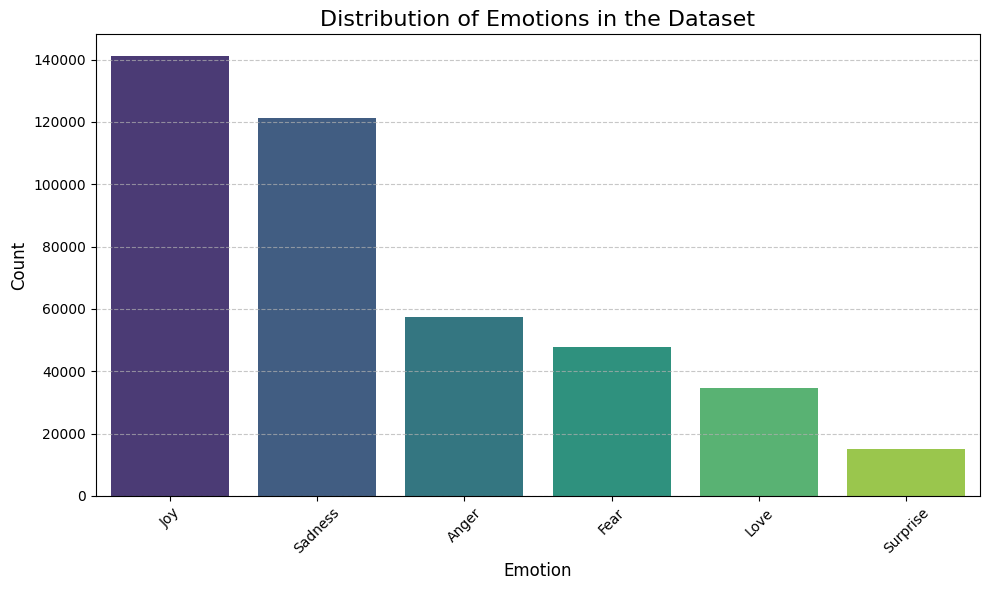

In [143]:
# Visualizing Distribution of Emotions

label_counts = df_dv['Label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Emotions in the Dataset', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

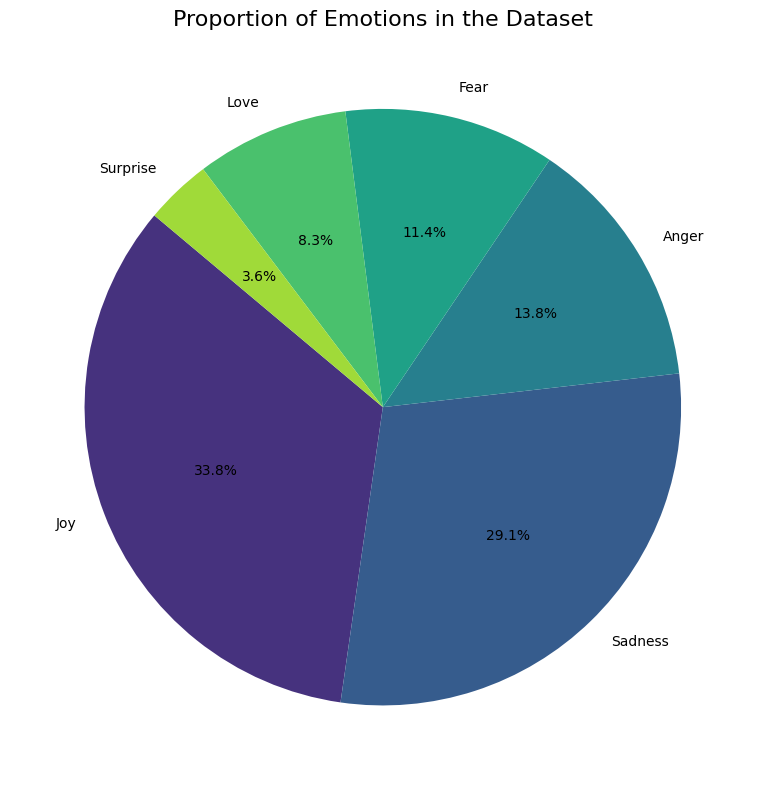

In [144]:
# Visualizing Emotion Distribution

plt.figure(figsize=(8, 8))

df_dv['Label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Proportion of Emotions in the Dataset', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

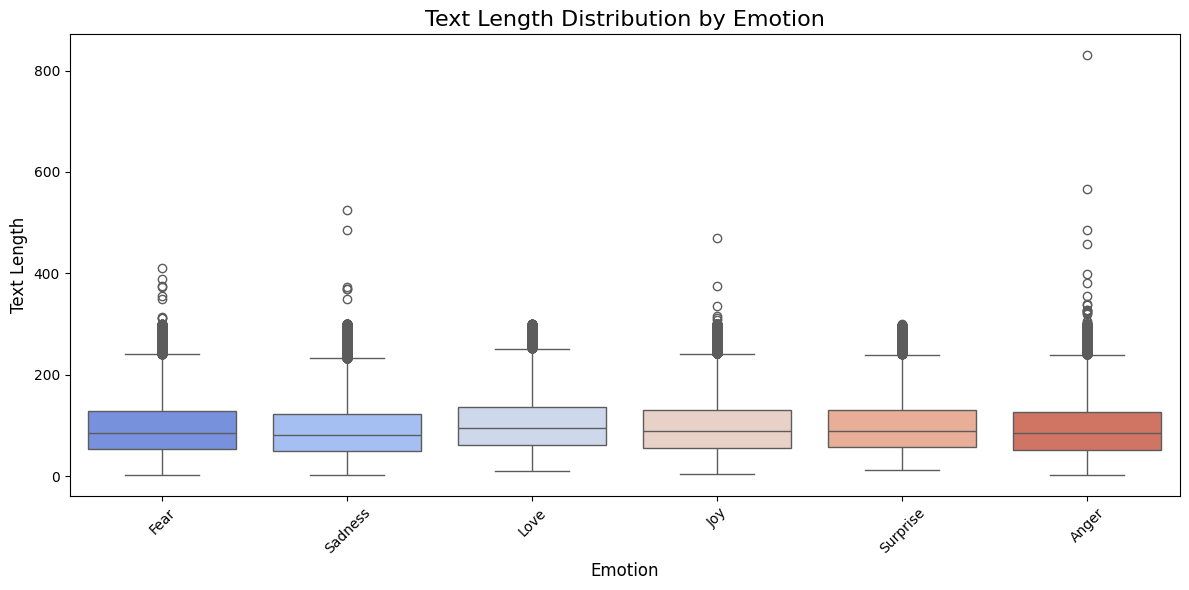

In [145]:
# Representing Text Length Distribution by Emotion

df_dv['Text_Length'] = df_dv['Text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Text_Length', data=df_dv, palette='coolwarm')
plt.title('Text Length Distribution by Emotion', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

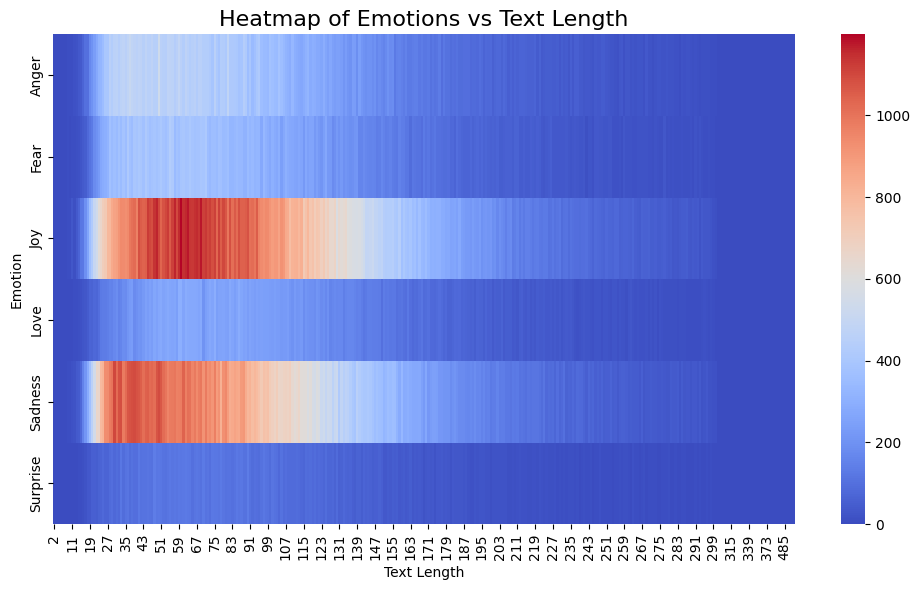

In [146]:
# Heatmap for Emotion Correlation

emotion_pivot = pd.crosstab(df_dv['Label'], df_dv['Text_Length'])

plt.figure(figsize=(10, 6))
sns.heatmap(emotion_pivot, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Emotions vs Text Length', fontsize=16)
plt.xlabel('Text Length')
plt.ylabel('Emotion')
plt.tight_layout()
plt.show()

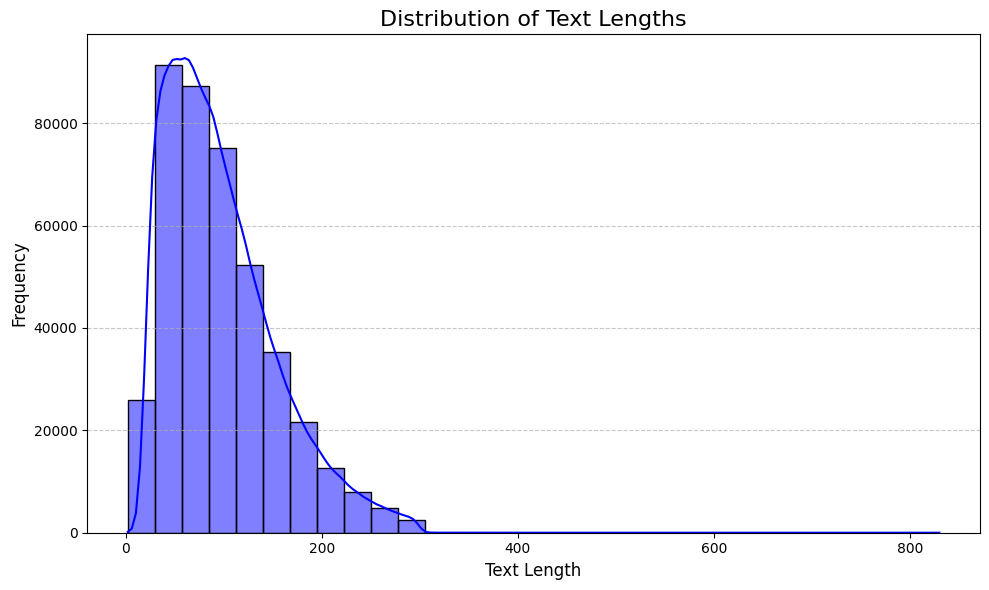

In [147]:
# Plotting Histogram for Distributon of Text Lengths

plt.figure(figsize=(10, 6))
df_dv['Text_Length'] = df_dv['Text'].apply(len)
sns.histplot(df_dv['Text_Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

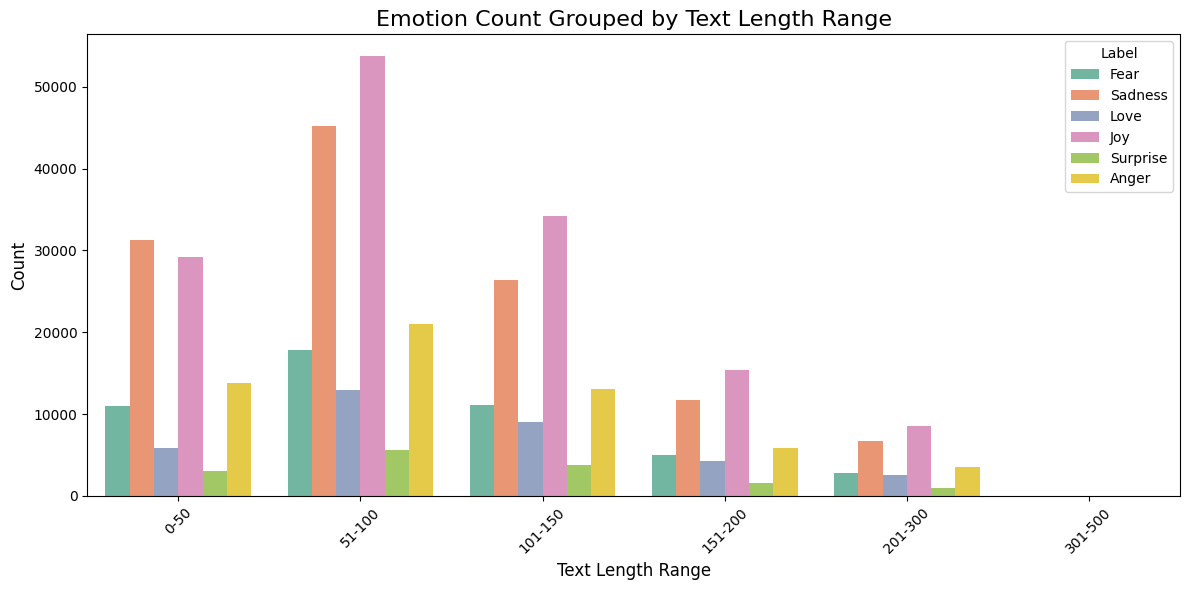

In [148]:
# Visualizing Emotion Count Grouped by Text Length Range

df_dv['Length_Bin'] = pd.cut(df_dv['Text_Length'], bins=[0, 50, 100, 150, 200, 300, 500],
                          labels=['0-50', '51-100', '101-150', '151-200', '201-300', '301-500'])

plt.figure(figsize=(12, 6))
sns.countplot(x='Length_Bin', hue='Label', data=df_dv, palette='Set2')
plt.title('Emotion Count Grouped by Text Length Range', fontsize=16)
plt.xlabel('Text Length Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

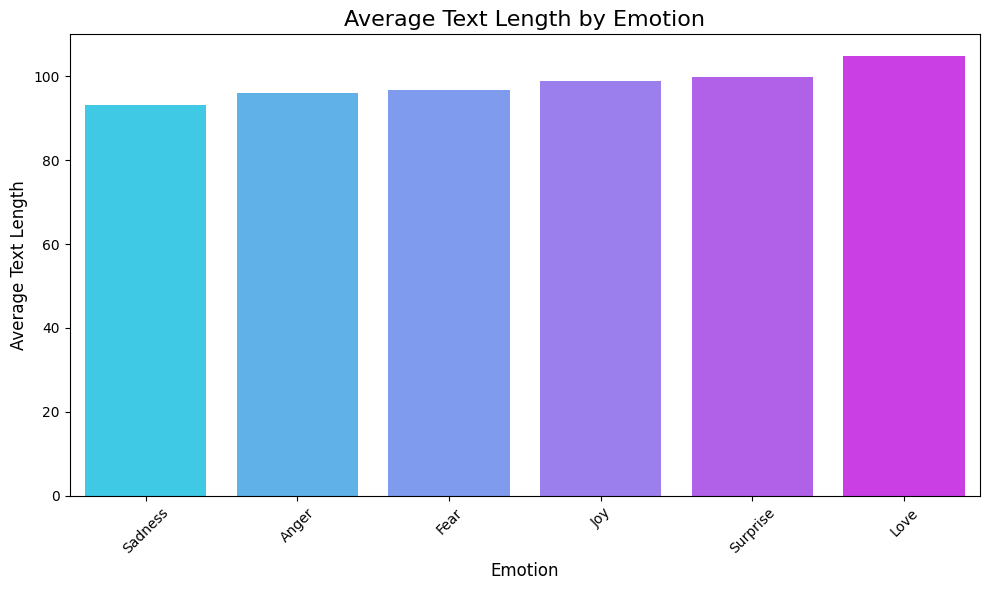

In [149]:
# Visualizing Average Text Length by Emotion

avg_text_length = df_dv.groupby('Label')['Text_Length'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_text_length.index, y=avg_text_length.values, palette='cool')
plt.title('Average Text Length by Emotion', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Average Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

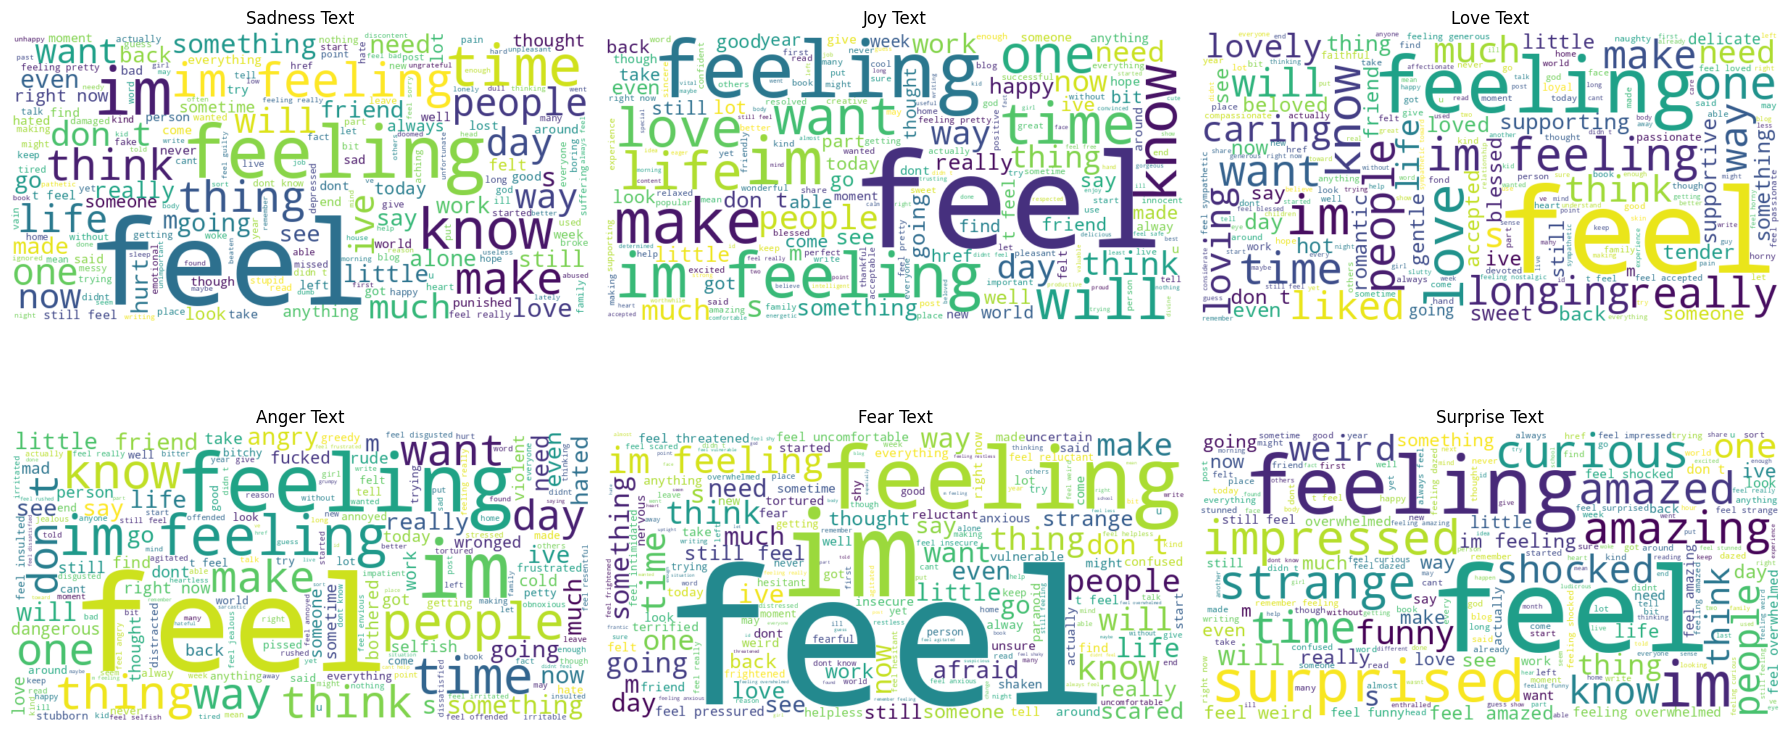

In [150]:
# Creating WordCloud for all the lables

from wordcloud import WordCloud

emotion_dfs = {
    'Sadness': df_dv[df_dv['Label'] == 'Sadness'],
    'Joy': df_dv[df_dv['Label'] == 'Joy'],
    'Love': df_dv[df_dv['Label'] == 'Love'],
    'Anger': df_dv[df_dv['Label'] == 'Anger'],
    'Fear': df_dv[df_dv['Label'] == 'Fear'],
    'Surprise': df_dv[df_dv['Label'] == 'Surprise']
}

plt.figure(figsize=(18, 9))
for i, (emotion, subset) in enumerate(emotion_dfs.items(), 1):
    combined_text = ' '.join(subset['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.subplot(2, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{emotion} Text')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Data Cleaning & Preprocessing

In [151]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import sklearn
from sklearn.model_selection import train_test_split

In [152]:
# Renaming the column name and labeling the emotions

df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [153]:
# Creating a pipeline for Data Cleaning

def clean_text_pipeline(df, text_column='Text'):

    stop = set(stopwords.words('english'))

    def clean_text(text):
        text = re.sub(r'http\S+', '', text)  # Removing URLs
        text = re.sub(r'[^\w\s]', '', text)  # Removing special characters and punctuation
        text = re.sub(r'\s+', ' ', text)     # Removing extra whitespaces
        text = re.sub(r'\d+', '', text)      # Removing numeric values
        text = text.lower()                  # Converting to lowercase
        text = ' '.join([word for word in text.split() if word not in stop])  # Removing stop words
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removing non-alphanumeric characters
        return text.strip()

    df[text_column] = df[text_column].apply(clean_text)

    return df

In [154]:
# Data Cleaning

df = clean_text_pipeline(df, text_column='Text')

In [155]:
# Train Test and Split

X = df['Text']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# Tokenization and Padding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

maxlen = max(len(tokens) for tokens in X_train_sequences)

X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post',)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

## Model Building

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Bidirectional, GRU, BatchNormalization, Dense

In [169]:
model = Sequential([

    Embedding(input_dim=50000, output_dim=50, input_length=maxlen),
    Dropout(0.5),

    Bidirectional(GRU(120, return_sequences=True)),
    Bidirectional(GRU(64, return_sequences=True)),

    BatchNormalization(),
    Bidirectional(GRU(64)),

    Dense(6, activation='softmax')
])

model.build(input_shape=(None, maxlen))


In [170]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [171]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 79, 50)              │       2,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 79, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_12 (Bidirectional)     │ (None, 79, 240)             │         123,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ (None, 79, 128)             │         117,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 79, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_14 (Bidirectional)     │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817,126 (10.75 MB)

 Trainable params: 2,816,870 (10.75 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
history = model.fit(
    X_train_padded,
    y_train, epochs=5,
    batch_size=1500,
    validation_data=(X_test_padded, y_test)
)

## Model Prediction

In [ ]:
history_df=pd.DataFrame(history.history)
history_df

In [ ]:
plt.figure(figsize=(15,5))

# plotting accuracy and val_accuracy
plt.subplot(1,2,1)
plt.plot(history_df['accuracy'],label='accuracy',c='red')
plt.plot(history_df['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('acc value')
plt.title('accuracy VS val_accuracy')
plt.legend()

# plotting loss and val_loss
plt.subplot(1,2,2)
plt.plot(history_df['loss'],label='loss',c='red')
plt.plot(history_df['val_loss'],label='val_loss')
plt.title('loss VS val_loss')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')